## Урок 6. Кейс 2. Данные в страховом бизнесе. EDA

__1. Напишите текстом как минимум 6 функций распределения и соответствующие им функции правдоподобия.<br>
Напишите, какие по вашему мнению целевые переменные из бизнеса (лучше - из страхового) соответствуют этим распределениям (по 2 примера на каждое).<br>
Пример: биномиальное распределение для задачи моделирования пролонгации (продлил клиент полис на следующий период или нет).__

Очевидно, что биномиальное распределение:<br>
- наступление страхового случая по конкретному клиенту в течение действия полиса
- приобретение нового полиса клиентом в зависимости от предыдущего опыта взаимодействия со страховщиком

Геометрическое распределение:<br>
- число рекламных звонков или обращений к клиенту, пока он не "сдастся" и не купит полис
- число периодов страхования, пока не возникнет страховой случай у конкретного клиента

Полиномиальное (мультиномиальное) распределение:<br>
- клиент купит полис ОСАГО, но не купит КАСКО в связи с приобретением нового автомобиля или тот и другой полисы, или только КАСКО, а за ОСАГО пойдет к другому страховщику, или вообще уйдет к другому страховщику
- при наступлении страхового случая, клиент использует только ОСАГО или ОСАГО и КАСКО, или только КАСКО

Нормальное распределение:<br>
- рост страховых случаев при резком изменении погоды в сезон осень-зима
- наступление страхового случая в определенной возрастной группе в зависимости от наличия газовой плиты в доме

Равномерное распределение:<br>
- наступление страхового случая в течение срока действия договора чартера яхты
- прибыль/убыток в течение года при неизменном пуле страхователей

Экспоненциальное распределение:<br>
- средняя продолжительность разговора с клиентом при обращении в кол-центр
- среднее время приобретения полиса у страховщика, пока страхователь не взбесился и не разгромил офис страховщика

__2. На основе датасета из ноутбука проведите анализ данных и постройте зависимости частоты и среднего убытка от какого-либо параметра (за исключением уже выполненных в ноутбуке).__

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
df = pd.read_csv('E:\GB\MachineLearning\MPL_R.csv', low_memory=False)
df.info()
# пришлось изменить имя файла, т.к. 'fre-' не читалось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343080 entries, 0 to 343079
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Exposure           343080 non-null  float64
 1   LicAge             343080 non-null  int64  
 2   RecordBeg          343080 non-null  object 
 3   RecordEnd          181115 non-null  object 
 4   VehAge             177880 non-null  object 
 5   Gender             343080 non-null  object 
 6   MariStat           343080 non-null  object 
 7   SocioCateg         343080 non-null  object 
 8   VehUsage           343080 non-null  object 
 9   DrivAge            343080 non-null  int64  
 10  HasKmLimit         343080 non-null  int64  
 11  BonusMalus         343080 non-null  int64  
 12  VehBody            145780 non-null  object 
 13  VehPrice           145780 non-null  object 
 14  VehEngine          145780 non-null  object 
 15  VehEnergy          145780 non-null  object 
 16  Ve

In [18]:
df.head()

,Exposure,LicAge,RecordBeg,RecordEnd,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,...,ClaimInd,Dataset,DeducType,ClaimNbResp,ClaimNbNonResp,ClaimNbParking,ClaimNbFireTheft,ClaimNbWindscreen,OutUseNb,RiskArea
0,0.583,366,2004-06-01,NaN,2,Female,Other,CSP1,Professional,55,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.200,187,2004-10-19,NaN,0,Male,Alone,CSP55,Private+trip to office,34,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.083,169,2004-07-16,2004-08-16,1,Female,Other,CSP1,Professional,33,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.375,170,2004-08-16,NaN,1,Female,Other,CSP1,Professional,34,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.500,224,2004-01-01,2004-07-01,3,Male,Other,CSP47,Professional,53,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
dct = {}
for i in range(1,11):
    _x = df.loc[df.Dataset == i].notnull().sum()
    dct[i] = list(_x[_x == 0].index)

print('Dataset  Missing Variables')
for x in range(1,11):
    print(x,'\t',dct[x])

Dataset  Missing Variables
1 	 ['DeducType', 'ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb', 'RiskArea']
2 	 ['DeducType', 'ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb', 'RiskArea']
3 	 ['ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb', 'RiskArea']
4 	 ['ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb', 'RiskArea']
5 	 ['VehAge', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass', 'RiskVar', 'Garage', 'DeducType']
6 	 ['VehAge', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass', 'RiskVar', 'Garage', 'DeducType']
7 	 ['VehAge', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass', 'RiskVar', 'Garage', 'DeducType']
8 	 ['VehAge', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass

In [22]:
df59 = df.loc[df.Dataset.isin([5, 6, 7, 8, 9])]
df59 = df59.drop(['Dataset'], axis=1)
df59 = df59.dropna(axis=1, how='all')
print('With duplicates\t\t', len(df59))
df59 = df59.drop_duplicates()
print('Without duplicates\t', len(df59))

With duplicates		 165200
Without duplicates	 115155


In [24]:
df = df59

# Вспомогательный столбец для суммирования числа полисов
df['PolicyCount'] = 1

# Вспомогательный столбец для суммирования числа полисов с убытками
df['ClaimCount'] = df['ClaimAmount'] > 0
# df['ClaimCount'] = abs(df['ClaimAmount'])

# Вспомогательный столбец для суммирования числа полисов без убытков
df['NoClaimCount'] = df.PolicyCount - df.ClaimCount

df.head()

,Exposure,LicAge,RecordBeg,RecordEnd,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,...,ClaimNbResp,ClaimNbNonResp,ClaimNbParking,ClaimNbFireTheft,ClaimNbWindscreen,OutUseNb,RiskArea,PolicyCount,ClaimCount,NoClaimCount
145780,0.083,332,2004-01-01,2004-02-01,Male,Other,CSP50,Professional,46,0,...,0.0,1.0,0.0,0.0,0.0,0.0,9.0,1,False,1
145781,0.916,333,2004-02-01,NaN,Male,Other,CSP50,Professional,46,0,...,0.0,1.0,0.0,0.0,0.0,0.0,9.0,1,False,1
145782,0.550,173,2004-05-15,2004-12-03,Male,Other,CSP50,Private+trip to office,32,0,...,0.0,2.0,0.0,0.0,0.0,0.0,7.0,1,False,1
145783,0.089,364,2004-11-29,NaN,Female,Other,CSP55,Private+trip to office,52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1,False,1
145784,0.233,426,2004-02-07,2004-05-01,Male,Other,CSP60,Private,57,0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1,False,1


На уроке разобрали много полезных параметров. Из оставшихся можно посмотреть на цель использования ТС.

In [28]:
df['VehUsage'].unique()

array(['Professional', 'Private+trip to office', 'Private',
       'Professional run'], dtype=object)

In [29]:
df_group_VehUsage = df[['Exposure', 'PolicyCount','ClaimAmount', 'ClaimCount', 'NoClaimCount']].groupby(df['VehUsage']).sum()
df_group_VehUsage = df_group_VehUsage.reset_index()
df_group_VehUsage['Freq'] = df_group_VehUsage.ClaimCount / df_group_VehUsage.Exposure
df_group_VehUsage['AvgClaim'] = df_group_VehUsage.ClaimAmount / df_group_VehUsage.ClaimCount

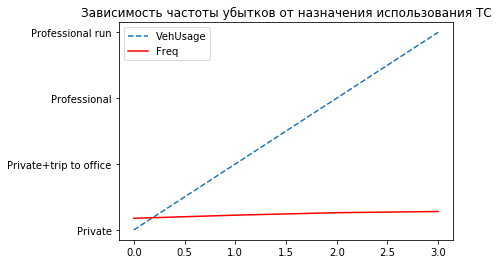

In [32]:
plt.plot(df_group_VehUsage['VehUsage'], linestyle='dashed', label='VehUsage' )
plt.plot(df_group_VehUsage['Freq'],'r', label='Freq')

plt.title('Зависимость частоты убытков от назначения использования ТС')
plt.legend()
plt.show()

Видно, что частота страховых случаев у спортивного и коммерческого транспорта выше, что ожидаемо и объяснимо их естесственной спецификой. Посмотрим на средний убыток.

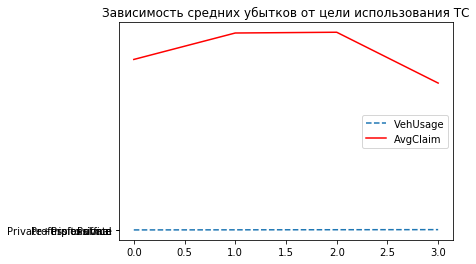

In [38]:
plt.plot(df_group_VehUsage['VehUsage'], linestyle='dashed', label='VehUsage' )
plt.plot(df_group_VehUsage['AvgClaim'],'r', label='AvgClaim')

plt.title('Зависимость средних убытков от цели использования ТС')
plt.legend()
plt.show()

Удивительно, что по гонщикам ниже, чем по частникам. Надо дополнительно смотреть на другие данные. Скажем, угоны или неполное возмещение стоимости болида. 